# Twitter Sentiment Analysis

In this problem, your goal is to develop recurrent neural networks for predicting the sentiment of tweets posted on Twitter. The dataset consists of over 13,000 tweets about the first 2016 GOP Presidential Debate in Cleveland, Ohio.  The dataset includes the actual tweets along with the sentiment for each tweet (3 classes: positive, negative, or neutral), as well as some other information like which candidate was mentioned, what subject was mentioned, etc.

We will use the tweets as input and the sentiment as the label for training our networks (other data elements will be discarded). This data originally came from Crowdflower's Data for Everyone library.

As always, I help you import the dataset and clean it. Your job is to do the deep learning part.

Run the code below to download the dataset.

In [ ]:
import pandas as pd
# Reading the data
data = pd.read_csv('https://www.dropbox.com/s/yab520pqr8zuqt0/Twitter.csv?dl=1')
# Keeping only the neccessary columns: the tweet and the sentiment (label)
data = data[['text','sentiment']]

Let's look at the first 10 rows of the dataset.

In [ ]:
data.head(10)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


Run the code below to convert all letters to lower case, remove anything that is not a letter or number (e.g., @ and #), and remove "RT" (re-tweet) at the beginning of each tweet.

In [ ]:
import re
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
# more info on the lambda fn: https://www.w3schools.com/python/python_lambda.asp
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

Now, let's look at the first 10 samples again. You see that the tweets are all cleaned up.

In [ ]:
data.head(10)

,text,sentiment
0,nancyleegrahn how did everyone feel about th...,Neutral
1,scottwalker didnt catch the full gopdebate l...,Positive
2,tjmshow no mention of tamir rice and the gop...,Neutral
3,robgeorge that carly fiorina is trending ho...,Positive
4,danscavino gopdebate w realdonaldtrump deliv...,Positive
5,gregabbott_tx tedcruz on my first day i will...,Positive
6,warriorwoman91 i liked her and was happy whe...,Negative
7,going on msnbc live with thomasarobe s around ...,Neutral
8,deer in the headlights lizzwinstead ben cars...,Negative
9,nancyosborne180 last nights debate proved it...,Negative


Let's see how many tweets (rows) we have.

In [ ]:
data.shape

(13871, 2)

We have 13,871 samples (tweets) in the dataset and, off course, two columns (the tweets along with their sentiment).

Run the code below to obtain the samples (tweets) and the labels, then integer-encode the labels.

In [ ]:
# Obtain the array of samples (tweets) and labels
samples = data['text'].values
labels = data['sentiment'].values

# Our labels are currently strings (Positive, Negative, Neutral) as you saw above.
# We can integer-encode them as follows:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

Before we get into questions, let's check the first 10 samples that are stored in the array called `samples` along with their true labels that are stored in the array called `labels`.

In [ ]:
samples[0:10]

array(['  nancyleegrahn how did everyone feel about the climate change question last night exactly gopdebate',
       '  scottwalker didnt catch the full gopdebate last night here are some of scotts best lines in 90 seconds walker16 httptcozsff',
       '  tjmshow no mention of tamir rice and the gopdebate was held in cleveland wow',
       '  robgeorge that carly fiorina is trending  hours after her debate  above any of the men in justcompleted gopdebate says shes on ',
       '  danscavino gopdebate w realdonaldtrump delivered the highest ratings in the history of presidential debates trump2016 httptco',
       '  gregabbott_tx tedcruz on my first day i will rescind every illegal executive action taken by barack obama gopdebate foxnews',
       '  warriorwoman91 i liked her and was happy when i heard she was going to be the moderator not anymore gopdebate megynkelly  https',
       'going on msnbc live with thomasarobe s around 2 pm et  gopdebate',
       'deer in the headlights   li

In [ ]:
labels[0:10]

array([1, 2, 1, 2, 2, 2, 0, 1, 0, 0])

As you see, the Neutral, Positive, and Negative labels are assigned values 1, 2, and 0, respectively.

## Question 1 (30 pts)

Conduct the necessary data preprocessing for the deep learning task at hand, including:

a.   tokenization of samples (consider only the top 10,000 words) [10 pts],

b.   padding of samples (length 100) [10 pts], and

c.   categorically encoding the labels (dummy coding the labels) [10 pts].



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing

# (a) We create an instance of tokenizer, configured to take
# into account the top-10000 most common words
tokenizer = Tokenizer(num_words=10000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer values (with different lengths) named 'sequences'
sequences = tokenizer.texts_to_sequences(samples)

In [ ]:
# (b) Padding the sequences to size 100
sequences = preprocessing.sequence.pad_sequences(sequences, maxlen=100)

In [ ]:
# (c) Categorically encoding the labels
# This is necessary because we have a multi-class single label classification task
# like the MNIST example we did in class
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)

## Question 2 (10 pts)

Shuffle and set aside 3,000 samples for validation and the remaining for training. (No need to create a test dataset for this problem.)

In [ ]:
from sklearn.utils import shuffle
sequences, labels = shuffle(sequences, labels)

val_data = sequences[:3000]
train_data = sequences[3000:]

val_labels = labels[:3000]
train_labels = labels[3000:]

## Question 3 (20 pts)

Develop a simple (vanilla) RNN model with 10 units (call this `model1`). Set the embedding dimension to 64. Use Adam optimizer and follow the accuracy metric during training. Train the model for 15 epochs and use batches of 256 samples. [10 pts]

When training is complete, plot the training and validation loss and accuracy. Interpret your plots. Does the model seem to be overfitting? Explain why / why not. [10 pts]

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model1 = models.Sequential()
model1.add(layers.Embedding(10000, 64, input_length=100))
model1.add(layers.SimpleRNN(10))
# The output layer must have 3 neurons and 'softmax' activation since this is a 3-class single label classification
model1.add(layers.Dense(3, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
model1_history = model1.fit(train_data,
                            train_labels,
                            epochs=15,
                            batch_size=256,
                            validation_data=(val_data, val_labels))

Epoch 1/15
43/43 [==============================] - 6s 110ms/step - loss: 0.9271 - accuracy: 0.5918 - val_loss: 0.8571 - val_accuracy: 0.6440
Epoch 2/15
43/43 [==============================] - 4s 100ms/step - loss: 0.7726 - accuracy: 0.6858 - val_loss: 0.8200 - val_accuracy: 0.6507
Epoch 3/15
43/43 [==============================] - 4s 104ms/step - loss: 0.6410 - accuracy: 0.7659 - val_loss: 0.7986 - val_accuracy: 0.6480
Epoch 4/15
43/43 [==============================] - 5s 106ms/step - loss: 0.5264 - accuracy: 0.8300 - val_loss: 0.7998 - val_accuracy: 0.6430
Epoch 5/15
43/43 [==============================] - 4s 100ms/step - loss: 0.4395 - accuracy: 0.8686 - val_loss: 0.8179 - val_accuracy: 0.6443
Epoch 6/15
43/43 [==============================] - 5s 110ms/step - loss: 0.3770 - accuracy: 0.8916 - val_loss: 0.8424 - val_accuracy: 0.6413
Epoch 7/15
43/43 [==============================] - 4s 101ms/step - loss: 0.3271 - accuracy: 0.9052 - val_loss: 0.8615 - val_accuracy: 0.6357
Epoch 

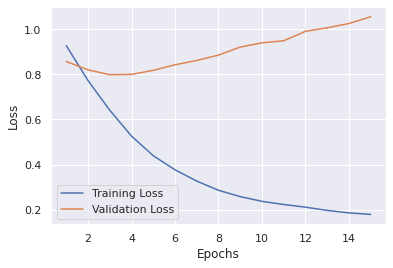

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc1  = model1_history.history['accuracy']
train_loss1 = model1_history.history['loss']
val_acc1  = model1_history.history['val_accuracy']
val_loss1 = model1_history.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

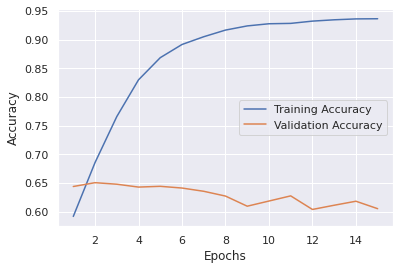

In [ ]:
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The model overfits after 3 epochs because, as we see in the first graph, the validation loss starts to increase after 3 epochs.

From the second graph, we can see that the model achieves over 90% accuracy on the training data but only about 60% accuracy on the validation data.

## Question 4 (20 pts)

Develop an LSTM model with one LSTM layer that includes 10 units. Use dropout and recurrent dropout in the LSTM layer (p=0.45 for both); call this `model2`. Set the embedding dimension to 64. Use Adam optimizer and follow the accuracy metric during training. Train the model for 15 epochs and use batches of 256 samples. [10 pts]

When training is complete, plot the training and validation loss and accuracy. Interpret your plots. Does the model seem to be overfitting? Explain why / why not. [10 pts]

In [ ]:
model2 = models.Sequential()

model2.add(layers.Embedding(10000, 64, input_length=100))
model2.add(layers.LSTM(10, dropout=0.45, recurrent_dropout=0.45))
model2.add(layers.Dense(3, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
model2_history = model2.fit(train_data,
                            train_labels,
                            epochs=15,
                            batch_size=256,
                            validation_data=(val_data, val_labels))

Epoch 1/15
43/43 [==============================] - 21s 436ms/step - loss: 0.9882 - accuracy: 0.5924 - val_loss: 0.9066 - val_accuracy: 0.6177
Epoch 2/15
43/43 [==============================] - 19s 440ms/step - loss: 0.8605 - accuracy: 0.6234 - val_loss: 0.8166 - val_accuracy: 0.6467
Epoch 3/15
43/43 [==============================] - 18s 417ms/step - loss: 0.7611 - accuracy: 0.6768 - val_loss: 0.7659 - val_accuracy: 0.6737
Epoch 4/15
43/43 [==============================] - 18s 422ms/step - loss: 0.6860 - accuracy: 0.7239 - val_loss: 0.7448 - val_accuracy: 0.6853
Epoch 5/15
43/43 [==============================] - 18s 420ms/step - loss: 0.6228 - accuracy: 0.7582 - val_loss: 0.7441 - val_accuracy: 0.6883
Epoch 6/15
43/43 [==============================] - 17s 401ms/step - loss: 0.5724 - accuracy: 0.7812 - val_loss: 0.7496 - val_accuracy: 0.6967
Epoch 7/15
43/43 [==============================] - 18s 430ms/step - loss: 0.5245 - accuracy: 0.8056 - val_loss: 0.7525 - val_accuracy: 0.6930

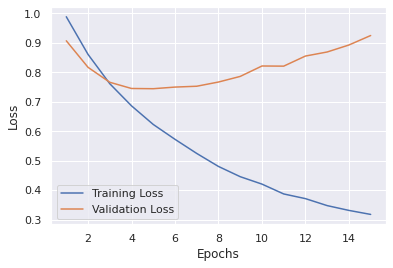

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc2  = model2_history.history['accuracy']
train_loss2 = model2_history.history['loss']
val_acc2  = model2_history.history['val_accuracy']
val_loss2 = model2_history.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

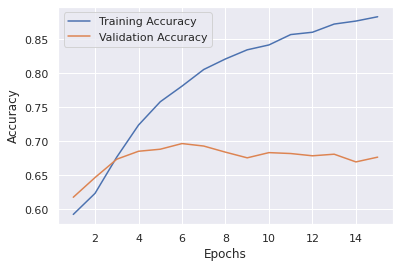

In [ ]:
plt.plot(epochs, train_acc2, label = 'Training Accuracy')
plt.plot(epochs, val_acc2, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The model overfits after about 5 epochs because, as we see in the first graph, the validation loss starts to increase after 5 epochs.

From the second graph, we can see that the model achieves over 85% accuracy on the training data and about 68% accuracy on the validation data.

## Question 6 (15 pts)

Plot the validation loss of `model1` and `model2` on the same graph to compare the two models head-to-head. Then, explain which model you would select and how you would build your final model. (no need to actually build a final model; just explain in English how you would go about that.)

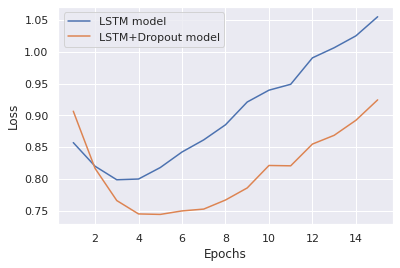

In [ ]:
# Comparing validation loss of the two models

epochs = range(1, len(val_loss1) + 1)

plt.plot(epochs, val_loss1, label = 'LSTM model')
plt.plot(epochs, val_loss2, label = 'LSTM+Dropout model')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The LSTM+Dropout model has a smaller validation loss (0.75) compared to the RNN model (0.80) at their robust fit (before they overfit). Thus, the LSTM+Dropout model is the better model among the two.

To select a final model, we can use early stopping to stop training the LSTM+Dropout model after 5 epochs.